In [185]:
#For creating table for comparing the performance of the four algorithems used
from IPython.display import HTML
dta = [['Random Forests', 0.9777,0.979], ['SVM', 0.9979,0], ['CART', 0.9121,0.839],['ANN',0.9007,0]]
df = pd.DataFrame(dta, columns = ['Model', 'Accuracy','Recall'])
# Set CSS properties for th elements in dataframe
df.style.highlight_max(axis=0,color='lightgreen')

,Model,Accuracy,Recall
0,Random Forests,0.9777,0.979
1,SVM,0.9979,0
2,CART,0.9121,0.839
3,ANN,0.9007,0


0.09702850212249849

In [150]:
#import pandas for reading csv files
import pandas as pd

In [113]:
#read in files
bank = pd.read_csv ('C:/Users/User/Desktop/nyulearningmaterial/2020Spring/datamining/hw4/UniversalBank_clean.csv')
print(bank)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4943  4996   29           3      40     92697       1    1.9          3   
4944  4997   30           4      15     92037       4    0.4          1   
4945  4998   63          39      24     93023       2    0.3          3   
4946  4999   65          40      49     90034       3    0.5          2   
4947  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [114]:
#To transform 'Education' and 'ZIP code' into categorical variables(one hot encoding)
edu_dum = pd.get_dummies(bank.Education) #group 4 as the reference
zip_dum = pd.get_dummies(bank['ZIP Code'])

In [115]:
#Add back dummy variables for edu and zip code into the bank dataset
bank_clean = pd.concat([bank,edu_dum], axis=1)
bank_clean = pd.concat([bank_clean,zip_dum], axis=1)
print(bank_clean)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4943  4996   29           3      40     92697       1    1.9          3   
4944  4997   30           4      15     92037       4    0.4          1   
4945  4998   63          39      24     93023       2    0.3          3   
4946  4999   65          40      49     90034       3    0.5          2   
4947  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  ...  95973  96001  96003  96008  96064  96091  \
0            0     

In [116]:
#Rename the dummy columns for education
bank_clean.rename(columns={'1': 'Edu1'})
bank_clean.rename(columns={'2': 'Edu2'})
bank_clean.rename(columns={'3': 'Edu3'})
#Remove the original columns 
bank_clean.drop('Education',axis = 1)
bank_clean.drop('ZIP Code',axis = 1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,...,95973,96001,96003,96008,96064,96091,96094,96145,96150,96651
0,1,25,1,49,4,1.6,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,4996,29,3,40,1,1.9,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4944,4997,30,4,15,4,0.4,1,85,0,0,...,0,0,0,0,0,0,0,0,0,0
4945,4998,63,39,24,2,0.3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4946,4999,65,40,49,3,0.5,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
import numpy as np
#Define labels
labels = np.array(bank_clean['Personal Loan'])
#Define features
features= bank_clean.drop('Personal Loan', axis = 1)
#Saving feature name
feature_list = list(features.columns)
#Convert to numpy array
features = np.array(features)

In [118]:
#Split data into training and testing sets with Skicit-learn
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets(0.8 of training set, 0.2 of test set)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [119]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3958, 483)
Training Labels Shape: (3958,)
Testing Features Shape: (990, 483)
Testing Labels Shape: (990,)


In [120]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
clf=RandomForestClassifier(n_estimators=100)

# Train the model on training data
clf.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
#Prediction result of training set
train_lable_pred=clf.predict(train_features)

In [163]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how many clinets were predicted correctly
print("Accuracy:",metrics.accuracy_score(train_labels, train_lable_pred))
print("Recall:",metrics.accuracy_score(train_labels, train_lable_pred))

Accuracy: 1.0
Recall: 1.0


In [171]:
#Predict on testing set
pred = clf.predict(test_features)
# Overall Accuracy
print("Accuracy:",metrics.accuracy_score(test_labels, pred))
print("Recall:",metrics.recall_score(test_labels, pred))

Accuracy: 0.9777777777777777
Recall: 0.7586206896551724


In [124]:
#Finding important features
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

Income        0.262572
CCAvg         0.149378
Family        0.058698
CD Account    0.046146
1             0.046001
                ...   
93003         0.000000
92835         0.000000
90813         0.000000
90505         0.000000
93111         0.000000
Length: 483, dtype: float64

No handles with labels found to put in legend.


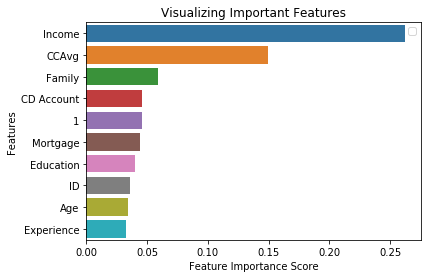

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

 type here

In [174]:
from sklearn import svm
#Construct a SVM model
clf_svm = svm.SVC()
#Train the model
clf_svm.fit(train_features,train_labels)
#Prediction result of training set
train_lable_pred_svm = clf_svm.predict(train_features)
# Model Accuracy: how many clinets were predicted correctly
print("Accuracy:",metrics.accuracy_score(train_labels, train_lable_pred_svm))
print("Recall:",metrics.recall_score(train_labels, train_lable_pred_svm))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.9979787771601819
Recall: 0.9796437659033079


In [175]:
#Predict on testing set
pred_svm = clf_svm.predict(test_features)
# Overall Accuracy
print("Accuracy:",metrics.accuracy_score(test_labels, pred_svm))
print("Recall:",metrics.recall_score(test_labels, pred_svm))

Accuracy: 0.9121212121212121
Recall: 0.0


In [176]:
from sklearn import tree
#Conctruct CART model
clf_cart = tree.DecisionTreeClassifier()
clf_cart.fit(train_features,train_labels)
#Prediction result of training set
train_lable_pred_cart = clf_cart.predict(train_features)
# Model Accuracy: how many clinets were predicted correctly
print("Accuracy:",metrics.accuracy_score(train_labels, train_lable_pred_cart))
print("Recall:",metrics.recall_score(train_labels, train_lable_pred_cart))

Accuracy: 1.0
Recall: 1.0


In [177]:
#Predict on testing set
pred_cart = clf_cart.predict(test_features)
# Overall Accuracy
print("Accuracy:",metrics.accuracy_score(test_labels, pred_cart))
print("Recall:",metrics.recall_score(test_labels, pred_cart))

Accuracy: 0.9747474747474747
Recall: 0.8390804597701149


[Text(207.28828125, 211.7178947368421, 'X[3] <= 114.5\ngini = 0.179\nsamples = 3958\nvalue = [3565, 393]'),
 Text(107.6765625, 200.2736842105263, 'X[6] <= 2.95\ngini = 0.043\nsamples = 3183\nvalue = [3113, 70]'),
 Text(41.85, 188.82947368421054, 'X[3] <= 106.5\ngini = 0.006\nsamples = 2939\nvalue = [2930, 9]'),
 Text(34.875, 177.38526315789474, 'gini = 0.0\nsamples = 2857\nvalue = [2857, 0]'),
 Text(48.825, 177.38526315789474, 'X[5] <= 3.5\ngini = 0.195\nsamples = 82\nvalue = [73, 9]'),
 Text(34.875, 165.94105263157894, 'X[122] <= 0.5\ngini = 0.111\nsamples = 68\nvalue = [64, 4]'),
 Text(27.900000000000002, 154.49684210526317, 'X[257] <= 0.5\ngini = 0.086\nsamples = 67\nvalue = [64, 3]'),
 Text(20.925, 143.05263157894737, 'X[77] <= 0.5\ngini = 0.059\nsamples = 66\nvalue = [64, 2]'),
 Text(13.950000000000001, 131.60842105263157, 'X[391] <= 0.5\ngini = 0.03\nsamples = 65\nvalue = [64, 1]'),
 Text(6.9750000000000005, 120.16421052631578, 'gini = 0.0\nsamples = 64\nvalue = [64, 0]'),
 Text(

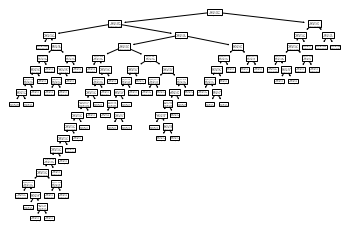

In [139]:
tree.plot_tree(clf_cart.fit(train_features,train_labels)) 

In [178]:
from sklearn.neural_network import MLPClassifier
#Construct ANN model
clf_ann = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(4, 2), random_state=1) #Choose adam because this dataset is large enough
clf_ann.fit(train_features,train_labels)
#Prediction result of training set
train_lable_pred_ann = clf_ann.predict(train_features)
# Model Accuracy: how many clinets were predicted correctly
print("Accuracy:",metrics.accuracy_score(train_labels, train_lable_pred_ann))
print("Recall:",metrics.recall_score(train_labels, train_lable_pred_ann))

Accuracy: 0.9007074279939363
Recall: 0.0


In [184]:
#Predict on testing set
pred_ann = clf_ann.predict(test_features)
# Overall Accuracy
print("Accuracy:",metrics.accuracy_score(test_labels, pred_ann))
print("Recall:",metrics.recall_score(test_labels, pred_ann))

Accuracy: 0.9121212121212121
Recall: 0.0
